# Laboratorio: Uso de filtros espaciales y morfológicos

## Operador de Apertura
Es un operador morfológico que es la sucesión de una erosión seguida por una dilatación. 
Principalmente, este operador sirve para separar objetos, ya que elimina los posibles detalles que haya en la imagen en función del elemento estructural.

## Operador Morfológico de Erosión
La principal utilidad de la erosión como operador morfológico es el de eliminar detalles, reducir contornos y, en algunos casos, desunir objetos.

## Operador Morfológico de Dilatación
La función de la operación dilatación consiste en potenciar y aumentar los contornos de una imagen binaria, haciendo que los detalles se magnifiquen e incluso que algunos objetos dentro de una imagen, que originalmente estén separados, se fusionen.

In [1]:
# Libreria openCV
import cv2
# Libreria NumPy
import numpy as np
# Liberia OS
import os
# Libreria para el uso de plot para mostrar las imagenes
from matplotlib import pyplot as plt

### Función que regresa una lista ordenada alfabéticamente de archivos con la extensión especificada en el directorio especificado

In [2]:
def getTestPicturesInPath(path, extension):
    pictures = []
    for file in os.listdir(path):
        if file.endswith(extension):
            pictures.append(os.path.join(path, file))
    
    pictures.sort()

    return pictures

### Función que regresa la máscara del color verde en HSV de una imagen

In [3]:
def getGreenMask(originalImage):
    # Se convierte la imagen original a colores HSV
    hsv = cv2.cvtColor(originalImage, cv2.COLOR_BGR2HSV)

    # Se define el rango del color verde en HSV
    lowerGreenLimit = np.array([40,40,40])
    upperGreenLimit = np.array([70,255,255])    

    # Se aplica el rango a la imagen hsv y se obtiene la imagen del color verde
    greenMask = cv2.inRange(hsv, lowerGreenLimit, upperGreenLimit)

    return greenMask

### Función que regresa una imagen a la que se le ha aplicado el operador morfológico de erosión

In [4]:
def erodeImage(image, structuralElementSize):
    # Creación del kernel
    kernel = np.ones((structuralElementSize, structuralElementSize), np.uint8)
    # Erosionar imagen usando cv2.erode()
    img = cv2.erode(image, kernel, iterations=1)    

    return img

### Función que regresa una imagen a la que se le ha aplicado el operador morfólogico de dilatación

In [5]:
def dilateImage(image, structuralElementSize):
    # Creación del kernel
    kernel = np.ones((structuralElementSize, structuralElementSize), np.uint8)
    # Dilatar imagen usando cv2.dilate()
    img = cv2.dilate(image, kernel, iterations=2)    

    return img  

### Función que cuenta el número de objetos en la imagen

In [6]:
def countObjects(img):
    counters = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    counters = counters[0] if len(counters) == 2 else counters[1]
    treeCount = 0
    for c in counters:
        area = cv2.contourArea(c)
        if area > 50:
            x,y,w,h = cv2.boundingRect(c)
            cv2.drawContours(img, [c], -1, (36,255,12), 2)
            treeCount += 1
    
    return treeCount

### Función que agrega la imagen al plot para ser mostrada

In [7]:
def addImageToPlot(img, title, subplot):
    plt.subplot(subplot)
    plt.imshow(img, "gray")
    plt.axis("off")
    plt.title(title)

### Función que agrega un titulo al plot

In [8]:
def addTitleToPlot():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Zonas verdes contadas: ' + str(count), fontsize=25)

### Inicia lógica principal

In [9]:
# Obtiene e imprime la lista de imagenes jpeg dentro del directorio pictures/
picturePathList = getTestPicturesInPath("pictures/", ".jpeg")
print("Imagenes a procesar: " + str(len(picturePathList)))

Imagenes a procesar: 6


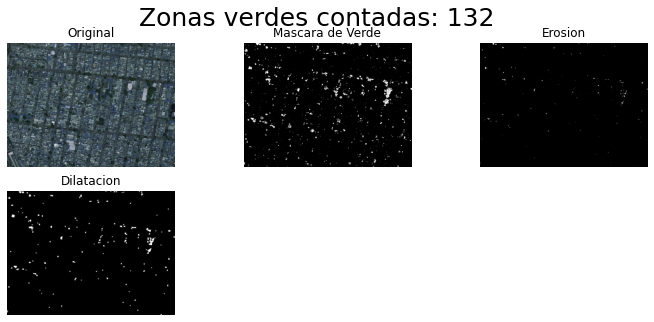

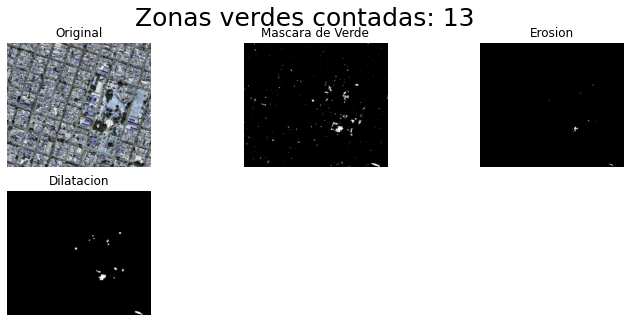

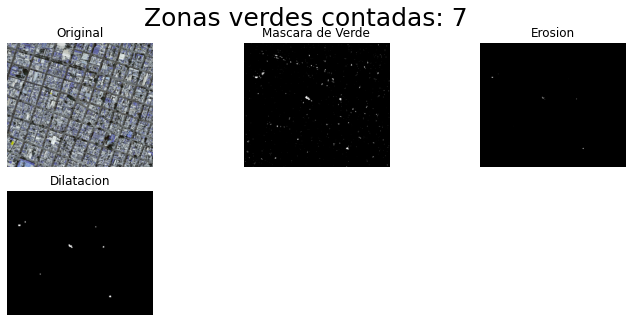

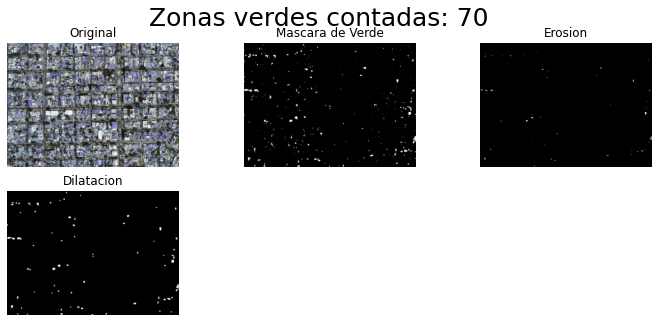

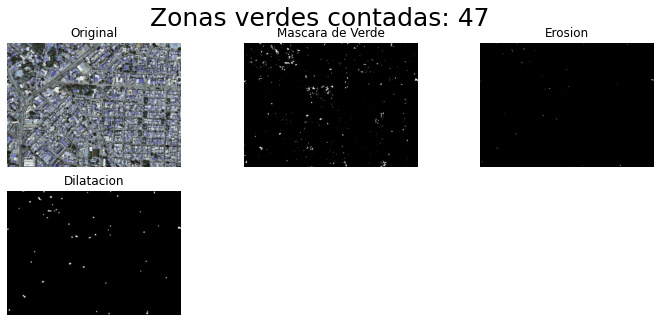

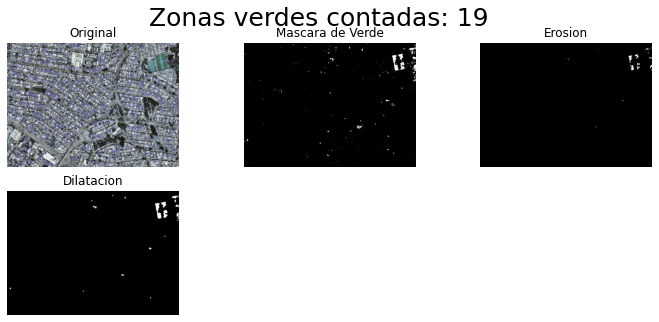

In [10]:
# Ciclo para procesar cada una de las imagenes
for picturePath in picturePathList:
    # Se lee la imagen del mapa con sus colores originales
    originalImage = cv2.imread(picturePath, cv2.IMREAD_UNCHANGED)

    # Extraer el color verde
    greenMask = getGreenMask(originalImage)

    # Tamaño del elemento estructural para aplicar erosion y dilatacion
    structuralElementSize = 5

    # Erosion
    imgEroded = erodeImage(greenMask, structuralElementSize)

    # Dilatacion
    imgDilated = dilateImage(imgEroded, structuralElementSize)

    # Contar
    count = countObjects(imgDilated)

    # Agrega un titulo al plot
    addTitleToPlot()

    # Se prepara cada imagen para ser mostrada
    addImageToPlot(originalImage, "Original", 231)
    addImageToPlot(greenMask, "Mascara de Verde", 232)
    addImageToPlot(imgEroded, "Erosion", 233)
    addImageToPlot(imgDilated, "Dilatacion", 234)

    # Se muestra una ventana con todas las imagenes de los pasos aplicados
    plt.show()